This is a file with all the income restricted housing units in Boston MA

In [81]:
#imports
import pandas as pd
from matplotlib import pyplot as plt
import pgeocode
import folium
from folium import plugins

In [59]:
df = pd.read_csv('income-restricted-inventory-2021.csv')
print("Total Income-Restricted Projects in Boston: "+ str(len(df)))

print(df.columns)
print(df.dtypes)
df.head()

Total Incoome-Restricted Projects in Boston: 1445
Index(['Project Name', 'Neighborhood', 'Zip Code', 'TtlProjUnits', 'RentUnits',
       'OwnUnits', 'TtlMarket', 'MarketRent', 'MarketOwn',
       'Total Income-Restricted', 'Income-Restricted Rental',
       'Income-Restricted Ownership', 'Tenure', 'Public/ Private',
       'Includes Senior Units?', 'Section 8'],
      dtype='object')
Project Name                    object
Neighborhood                    object
Zip Code                       float64
TtlProjUnits                     int64
RentUnits                        int64
OwnUnits                         int64
TtlMarket                      float64
MarketRent                     float64
MarketOwn                      float64
Total Income-Restricted          int64
Income-Restricted Rental         int64
Income-Restricted Ownership    float64
Tenure                          object
Public/ Private                 object
Includes Senior Units?          object
Section 8                   

Project Name Neighborhood  Zip Code  TtlProjUnits  RentUnits  \
0  Abbot Street/ Shawmut Ave      Roxbury    2119.0            16         16   
1            Academy Homes I      Roxbury    2119.0           202        202   
2           Academy Homes II      Roxbury    2119.0           236        236   
3        Adams Court Phase A     Mattapan    2126.0            50         50   
4        Adams Court Phase B     Mattapan    2126.0            45         45   

   OwnUnits  TtlMarket  MarketRent  MarketOwn  Total Income-Restricted  \
0         0        0.0         0.0        0.0                       16   
1         0       52.0        52.0        0.0                      150   
2         0        0.0         0.0        0.0                      236   
3         0        0.0         0.0        0.0                       50   
4         0        0.0         0.0        0.0                       45   

   Income-Restricted Rental  Income-Restricted Ownership  Tenure  \
0                        16                          0.0  Rental   
1                       150                          0.0  Rental   
2                       236                          0.0  Rental   
3                        50                          0.0  Rental   
4                        45                          0.0  Rental   

  Public/ Private Includes Senior Units? Section 8  
0         Private                    NaN       NaN  
1         Private                    NaN       NaN  
2         Private                    NaN         Y  
3         Private                    NaN       NaN  
4         Private                    NaN       NaN

Problem: The income restricted housing units doesn't contain addresses, instead they contain Project names and neighborhoods, and this is not helpful at all in identifying which owner occupied houses are not affordable right now. Is there a different data set we could be provided?

Current Analysis Goals: See where most of the affordable housing units fall(we will be using neighborhoods for this) and see how much of that area has owner occupied houses.

In [23]:
df[df["Zip Code"].isnull()]

Project Name Neighborhood  Zip Code  TtlProjUnits  \
129  Buildable Lots - Codman Square   Dorchester       NaN             6   
131         Buildable Lots - Uphams   Dorchester       NaN             6   
133             Buildable Lots- 3&4   Dorchester       NaN            18   

     RentUnits  OwnUnits  TtlMarket  MarketRent  MarketOwn  \
129          0         6        1.0         0.0        1.0   
131          0         6        0.0         0.0        0.0   
133          0        18        8.0         0.0        8.0   

     Total Income-Restricted  Income-Restricted Rental  \
129                        5                         0   
131                        6                         0   
133                       10                         0   

     Income-Restricted Ownership     Tenure Public/ Private  \
129                          5.0  Ownership         Private   
131                          6.0  Ownership         Private   
133                         10.0  Ownership         Private   

    Includes Senior Units? Section 8  
129                    NaN       NaN  
131                    NaN       NaN  
133                    NaN       NaN

In [24]:
df.loc[129, 'Zip Code'] = 2125
df.loc[131, 'Zip Code'] = 2125
df.loc[133, 'Zip Code'] = 2125
#NANS found in the zips of each of these rows

In [25]:
df[df["Zip Code"].isnull()]
#all good now

Empty DataFrame
Columns: [Project Name, Neighborhood, Zip Code, TtlProjUnits, RentUnits, OwnUnits, TtlMarket, MarketRent, MarketOwn, Total Income-Restricted, Income-Restricted Rental, Income-Restricted Ownership, Tenure, Public/ Private, Includes Senior Units?, Section 8]
Index: []

In [42]:
#zip codes were messed up being stored as float so this gets cleaned up
df['Zip Code'] = df.apply(lambda row: '0'+str(int(row[2])),axis = 1)
df.head()

Project Name Neighborhood Zip Code  TtlProjUnits  RentUnits  \
0  Abbot Street/ Shawmut Ave      Roxbury    02119            16         16   
1            Academy Homes I      Roxbury    02119           202        202   
2           Academy Homes II      Roxbury    02119           236        236   
3        Adams Court Phase A     Mattapan    02126            50         50   
4        Adams Court Phase B     Mattapan    02126            45         45   

   OwnUnits  TtlMarket  MarketRent  MarketOwn  Total Income-Restricted  \
0         0        0.0         0.0        0.0                       16   
1         0       52.0        52.0        0.0                      150   
2         0        0.0         0.0        0.0                      236   
3         0        0.0         0.0        0.0                       50   
4         0        0.0         0.0        0.0                       45   

   Income-Restricted Rental  Income-Restricted Ownership  Tenure  \
0                        16                          0.0  Rental   
1                       150                          0.0  Rental   
2                       236                          0.0  Rental   
3                        50                          0.0  Rental   
4                        45                          0.0  Rental   

  Public/ Private Includes Senior Units? Section 8    Zip  
0         Private                    NaN       NaN  02119  
1         Private                    NaN       NaN  02119  
2         Private                    NaN         Y  02119  
3         Private                    NaN       NaN  02126  
4         Private                    NaN       NaN  02126

In [46]:
groupZips = df.groupby('Zip Code')
#creates subdata frames using group by 
groupKeys = list(groupZips.groups.keys()) #list Note the gorup keys are strings
#access a specific group using : $groupZips.get_group(<groupName>)

Amount of Income restricted housing projects in Zip Code of 02108 : 1
Amount of Income restricted housing projects in Zip Code of 02109 : 5
Amount of Income restricted housing projects in Zip Code of 02110 : 4
Amount of Income restricted housing projects in Zip Code of 02111 : 25
Amount of Income restricted housing projects in Zip Code of 02113 : 5
Amount of Income restricted housing projects in Zip Code of 02114 : 22
Amount of Income restricted housing projects in Zip Code of 02115 : 35
Amount of Income restricted housing projects in Zip Code of 02116 : 31
Amount of Income restricted housing projects in Zip Code of 02118 : 110
Amount of Income restricted housing projects in Zip Code of 02119 : 175
Amount of Income restricted housing projects in Zip Code of 02120 : 43
Amount of Income restricted housing projects in Zip Code of 02121 : 134
Amount of Income restricted housing projects in Zip Code of 02122 : 42
Amount of Income restricted housing projects in Zip Code of 02124 : 165
Amount

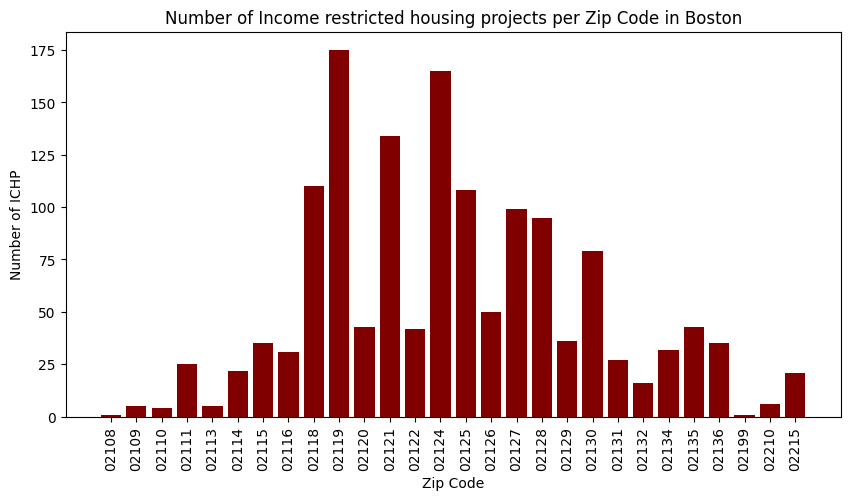

In [71]:
dfDict = {'zipCode':[],'totalUnits':[],'Projects':[]}
d = {}
for i in groupKeys:
    groupDf = groupZips.get_group(i)
    d[i] = len(groupDf)
    #3 lines below help create the dict that will be used to create simple dataFrame
    dfDict['zipCode'].append(i)
    dfDict['Projects'].append(len(groupDf))
    dfDict['totalUnits'].append(groupDf['TtlProjUnits'].sum())
    print("Amount of Income restricted housing projects in Zip Code of " + i + " : " + str(len(groupDf)))


types = list(d.keys())
values = list(d.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(types, values, color ='maroon')
 
plt.xlabel("Zip Code")
plt.ylabel("Number of ICHP")
plt.title("Number of Income restricted housing projects per Zip Code in Boston")
plt.xticks(rotation=90)
plt.show()


Amount of Income restricted housing UNITS in Zip Code of 02108 : 96
Amount of Income restricted housing UNITS in Zip Code of 02109 : 540
Amount of Income restricted housing UNITS in Zip Code of 02110 : 609
Amount of Income restricted housing UNITS in Zip Code of 02111 : 2570
Amount of Income restricted housing UNITS in Zip Code of 02113 : 256
Amount of Income restricted housing UNITS in Zip Code of 02114 : 4582
Amount of Income restricted housing UNITS in Zip Code of 02115 : 3517
Amount of Income restricted housing UNITS in Zip Code of 02116 : 3729
Amount of Income restricted housing UNITS in Zip Code of 02118 : 9389
Amount of Income restricted housing UNITS in Zip Code of 02119 : 7071
Amount of Income restricted housing UNITS in Zip Code of 02120 : 2854
Amount of Income restricted housing UNITS in Zip Code of 02121 : 4715
Amount of Income restricted housing UNITS in Zip Code of 02122 : 717
Amount of Income restricted housing UNITS in Zip Code of 02124 : 4377
Amount of Income restricte

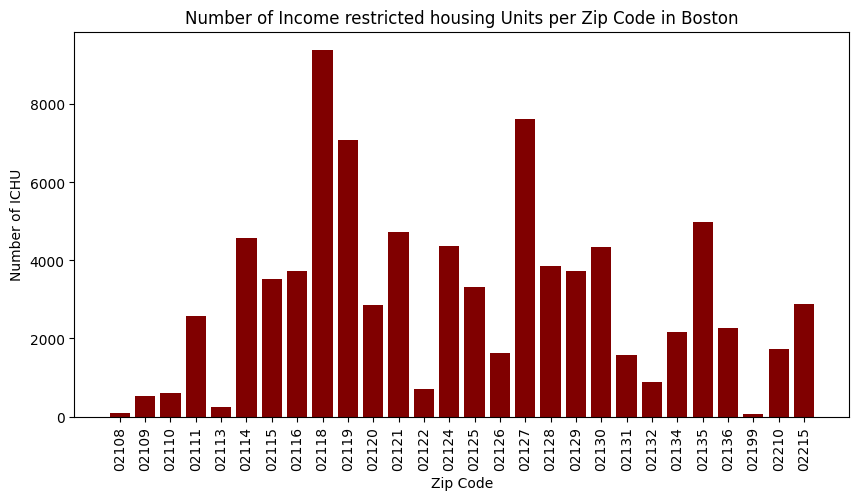

In [76]:
d = {}
for i in groupKeys:
    groupDf = groupZips.get_group(i)
    d[i] = groupDf['TtlProjUnits'].sum()
    print("Amount of Income restricted housing UNITS in Zip Code of " + i + " : " + str(groupDf['TtlProjUnits'].sum()))


types = list(d.keys())
values = list(d.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(types, values, color ='maroon')
 
plt.xlabel("Zip Code")
plt.ylabel("Number of ICHU")
plt.title("Number of Income restricted housing Units per Zip Code in Boston")
plt.xticks(rotation=90)
plt.show()



THE HISTOGRAM ABOVE IS PART OF THE ANSWER TO BASE QUESTION 2

In [60]:
print("Total Income-Restricted Units in Boston: " + str(df['TtlProjUnits'].sum()))

Total Income-Restricted Units in Boston: 86065


So the total Income restricuted units in Boston is about 86k. Note this also includes the amount which are ownership units. 

In [73]:
zipDf = pd.DataFrame(dfDict, columns = ['zipCode', 'totalUnits','Projects'])
zipDf.head()

zipCode  totalUnits  Projects
0   02108          96         1
1   02109         540         5
2   02110         609         4
3   02111        2570        25
4   02113         256         5

In [80]:
#lets add lat and long so we can plot heatmaps
nomi = pgeocode.Nominatim('us')
bostonZipslat= {}
bostonZipslong = {}
zips = list(zipDf['zipCode'])
#print(zips)


for i in zips:
    t = nomi.query_postal_code(i)
    bostonZipslat[i] = t['latitude']
    bostonZipslong[i] = t['longitude']

zipDf['latitude'] = zipDf.apply(lambda row: bostonZipslat[row[0]],axis = 1)
zipDf['longitude'] = zipDf.apply(lambda row: bostonZipslong[row[0]],axis =1)
zipDf.head()





zipCode  totalUnits  Projects  latitude  longitude
0   02108          96         1   42.3576   -71.0684
1   02109         540         5   42.3600   -71.0545
2   02110         609         4   42.3576   -71.0514
3   02111        2570        25   42.3503   -71.0629
4   02113         256         5   42.3657   -71.0560

In [99]:
bare = zipDf[["latitude","longitude","totalUnits"]]
map = folium.Map(location = [42.35, -71.06],zoom_start=13)
hm = plugins.HeatMap(bare)
hm.add_to(folium.FeatureGroup(name='Heat Map').add_to(map))
folium.LayerControl().add_to(map)
display(map)
map.save("incomeRestrictedHousing.html")


Here we can see visualize the Geogrpahical distribution of income restricted housing units by neighborhood

In [88]:
from geopy.geocoders import Nominatim

In [98]:
geolocator = Nominatim(user_agent="geoapiExercises")
place = "Dorchester, Boston"
location = geolocator.geocode(place)
print(location.raw)

{'place_id': 298670555, 'licence': 'Data Â© OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 4033668, 'boundingbox': ['42.267159', '42.3352405', '-71.0793082', '-71.0326914'], 'lat': '42.2973205', 'lon': '-71.0744952', 'display_name': 'Dorchester, Boston, Suffolk County, Massachusetts, United States', 'class': 'place', 'type': 'suburb', 'importance': 0.6536547140109368, 'icon': 'https://nominatim.openstreetmap.org/ui/mapicons/poi_place_village.p.20.png'}
